### EDA for the multi-task classification

### Requirments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [3]:
METADATA_PATH = '../data/multiData/'
LABEL_MULTI = LABEL_MULTI = ['No Defect', 'Type 1', 'Type 2', 'Type 3', 'Type 4'] 

### Multi Dataset

In [6]:
df = pd.read_csv(METADATA_PATH+'multi_task_data.csv')

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].shape[0]
imgs_with_one_defect = df.ImageId[df.ClassId > 0].shape[0]

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

print('\tNumber of images with one defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_one_defect, imgs_with_one_defect*100/unique_img))
df.head()

INFO:
	DefectID:						[0, 1, 2, 3, 4]
	Number of examples:					12141
	Number of unique images:				12141

	Number of images with no defect:			5902 (48.61%)
	Number of images with one defect:			6239 (51.39%)


,ImageId,ClassId,EncodedPixels,Folder
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,0
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,0
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...,0
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...,0


In [4]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Type 1', 2:'Type 2', 3:'Type 3', 4:'Type 4'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'}
Class Distribution:		[5902, 769, 195, 4759, 516]
Class Relative Distribution:	[0.486, 0.063, 0.016, 0.392, 0.043]


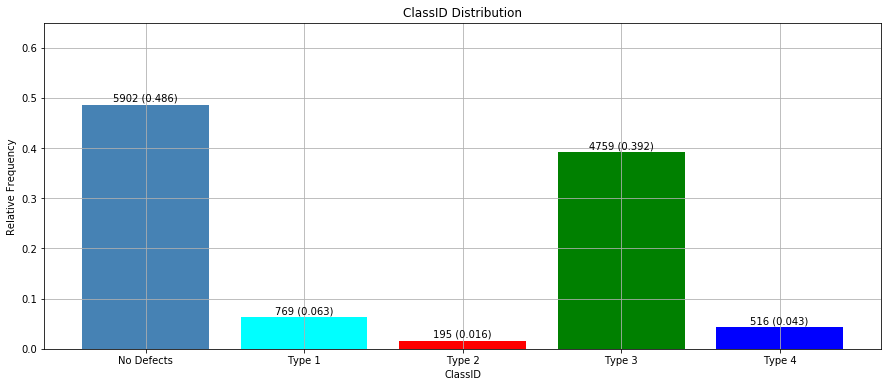

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['steelblue', 'cyan', 'red', 'green', 'blue'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.65])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Train Dataset

In [9]:
df = pd.read_csv(METADATA_PATH+'train_data.csv')

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].shape[0]

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

for i in range(1, 5):
    imgs_with_one_defect = df.ImageId[df.ClassId == i].shape[0]
    print('\tNumber of images with type {} defect:\t\t\t{} ({:.2f}%)'
          .format(i, imgs_with_one_defect, imgs_with_one_defect*100/unique_img))
df.head()

INFO:
	DefectID:						[0, 1, 2, 3, 4]
	Number of examples:					7285
	Number of unique images:				7285

	Number of images with no defect:			3530 (48.46%)
	Number of images with type 1 defect:			459 (6.30%)
	Number of images with type 2 defect:			113 (1.55%)
	Number of images with type 3 defect:			2882 (39.56%)
	Number of images with type 4 defect:			301 (4.13%)


,ImageId,ClassId,EncodedPixels,Folder
0,0e650e720.jpg,4,271630 2 271885 5 272140 9 272396 11 272651 14...,9
1,6dfc0dc98.jpg,0,NaN,231
2,85be23fbf.jpg,0,NaN,244
3,194f48184.jpg,0,NaN,181
4,9ae440fd0.jpg,3,9998 33 10254 33 10510 33 10766 33 11022 33 11...,100


In [7]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Type 1', 2:'Type 2', 3:'Type 3', 4:'Type 4'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'}
Class Distribution:		[3530, 459, 113, 2882, 301]
Class Relative Distribution:	[0.485, 0.063, 0.016, 0.396, 0.041]


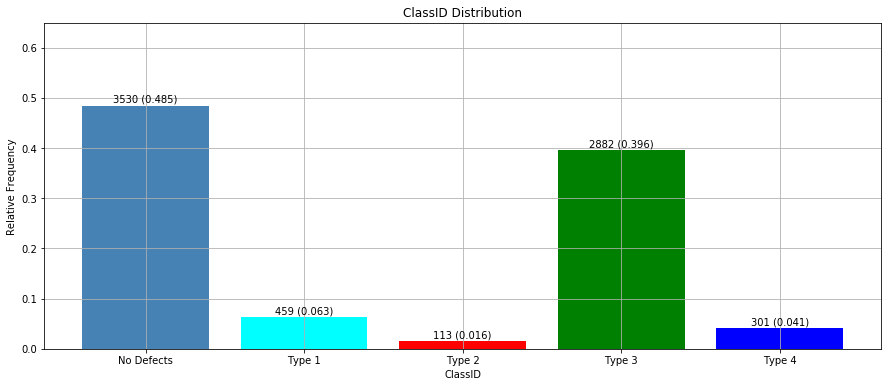

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['steelblue', 'cyan', 'red', 'green', 'blue'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.65])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Validation Dataset

In [11]:
df = pd.read_csv(METADATA_PATH+'val_data.csv')

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].shape[0]
imgs_with_one_defect = df.ImageId[df.ClassId == 1].shape[0]

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

print('\tNumber of images with one defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_one_defect, imgs_with_one_defect*100/unique_img))
df.head()

INFO:
	DefectID:						[0, 1, 2, 3, 4]
	Number of examples:					2428
	Number of unique images:				2428

	Number of images with no defect:			1232 (50.74%)
	Number of images with one defect:			150 (6.18%)


,ImageId,ClassId,EncodedPixels,Folder
0,c85251430.jpg,3,162314 33 162564 99 162819 250 163075 250 1633...,130
1,ab6530468.jpg,3,41985 22 42241 64 42497 107 42753 149 43009 19...,111
2,5ca2ccd75.jpg,3,159227 4 159476 11 159724 19 159973 26 160222 ...,59
3,18eeb26f7.jpg,0,NaN,181
4,6c52f92bc.jpg,0,NaN,231


In [12]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Type 1', 2:'Type 2', 3:'Type 3', 4:'Type 4'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'}
Class Distribution:		[1232, 150, 38, 908, 100]
Class Relative Distribution:	[0.507, 0.062, 0.016, 0.374, 0.041]


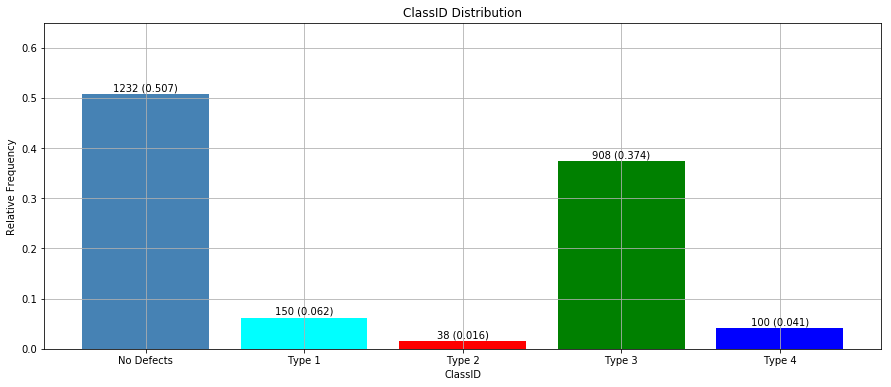

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['steelblue', 'cyan', 'red', 'green', 'blue'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.65])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()

### Test Set

In [14]:
df = pd.read_csv(METADATA_PATH+'test_data.csv')

total_examples = df.shape[0]
unique_img = df.ImageId.unique().shape[0]
imgs_with_no_defect = df.ImageId[df.ClassId == 0].shape[0]
imgs_with_one_defect = df.ImageId[df.ClassId == 1].shape[0]

print('INFO:')
print('\tDefectID:\t\t\t\t\t\t{}'.format(sorted(df.ClassId.unique())))
print('\tNumber of examples:\t\t\t\t\t{}'.format(total_examples))
print('\tNumber of unique images:\t\t\t\t{}\n'.format(unique_img))

print('\tNumber of images with no defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_no_defect, imgs_with_no_defect*100/unique_img))

print('\tNumber of images with one defect:\t\t\t{} ({:.2f}%)'
      .format(imgs_with_one_defect, imgs_with_one_defect*100/unique_img))
df.head()

INFO:
	DefectID:						[0, 1, 2, 3, 4]
	Number of examples:					2428
	Number of unique images:				2428

	Number of images with no defect:			1140 (46.95%)
	Number of images with one defect:			160 (6.59%)


,ImageId,ClassId,EncodedPixels,Folder
0,bd9e49b45.jpg,0,NaN,276
1,0f3de4dde.jpg,0,NaN,175
2,1e4e988cd.jpg,3,301173 2 301425 7 301660 2 301680 8 301914 4 3...,19
3,d5b2ba152.jpg,3,129283 43 129539 127 129795 211 130051 254 130...,139
4,8d02760e9.jpg,0,NaN,249


In [15]:
class_dist = df.ClassId.value_counts().sort_index()
ClassId2ClassName = {0: 'No Defects', 1:'Type 1', 2:'Type 2', 3:'Type 3', 4:'Type 4'}
relative_fr = [round(i, 3) for i in class_dist.values/class_dist.sum()]
print('Class ID meaning:\t\t{}'.format(ClassId2ClassName))
print('Class Distribution:\t\t{}'.format(list(class_dist.values)))
print('Class Relative Distribution:\t{}'.format(relative_fr))

Class ID meaning:		{0: 'No Defects', 1: 'Type 1', 2: 'Type 2', 3: 'Type 3', 4: 'Type 4'}
Class Distribution:		[1140, 160, 44, 969, 115]
Class Relative Distribution:	[0.47, 0.066, 0.018, 0.399, 0.047]


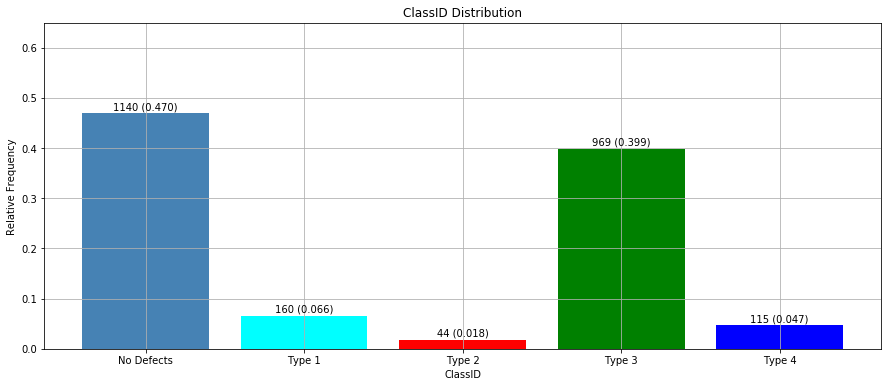

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
bar1 = ax.bar(ClassId2ClassName.values(), class_dist/class_dist.sum(),
         color=['steelblue', 'cyan', 'red', 'green', 'blue'])
ax.set_title('ClassID Distribution')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('ClassID')
ax.grid()
ax.set_ylim([0, 0.65])

for i, rect in enumerate(bar1):
    height = rect.get_height()
    text = '{} ({:.3f})'.format(class_dist.values[i], height)
    plt.text(rect.get_x() + rect.get_width()/2.0, height+0.003, text, ha='center', va='bottom')
plt.show()